# 股票收盤價日線資料探索
### 估計股票價格的波動程度，但如果昨天價格的統計性質與今天有很大不一樣，就沒辦法合理評估今天價格的波動

## 1. 讀入資料，使用創建好的資料庫 

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import numpy as np

In [2]:
db = sqlite3.connect('twstock2')
### 挑選一些股票
stock_dict = {}
### update()用法為 如果key已存在 則會更新value
## 台積電 2330 
stock_dict.update({'台積電':pd.read_sql(con = db, sql = 'SELECT * FROM "2330"')})
## 聯電 2303
stock_dict.update({'聯電':pd.read_sql(con = db, sql = 'SELECT * FROM "2303"')})
## 岱宇 1598 
stock_dict.update({'岱宇':pd.read_sql(con = db, sql = 'SELECT * FROM "1598"')})
## 欣興 3037
stock_dict.update({'欣興':pd.read_sql(con = db, sql = 'SELECT * FROM "3037"')})
## 景碩 3189
stock_dict.update({'景碩':pd.read_sql(con = db, sql = 'SELECT * FROM "3189"')})
## 金像電
stock_dict.update({'金像電':pd.read_sql(con = db, sql = 'SELECT * FROM "2368"')})
## 大立光
stock_dict.update({'大立光':pd.read_sql(con = db, sql = 'SELECT * FROM "3008"')})


## 2. 繪製基本股價走勢圖

In [4]:
stock_dict['大立光'].head() ### 價格目前已字串存取 要改一下

,index,證券名稱,成交股數,成交筆數,成交金額,開盤價,最高價,最低價,收盤價,漲跌(+/-),漲跌價差,最後揭示買價,最後揭示買量,最後揭示賣價,最後揭示賣量,本益比,Date
0,670,大立光,"579,355","1,672","2,059,315,250","3,590.00","3,590.00","3,535.00","3,535.00",-,40.0,"3,535.00",2,"3,550.00",1,16.72,2020-08-26 00:00:00
1,670,大立光,"1,108,875","2,864","3,865,654,375","3,550.00","3,555.00","3,460.00","3,460.00",-,75.0,"3,455.00",14,"3,460.00",3,16.36,2020-08-27 00:00:00
2,670,大立光,"1,223,426","2,685","4,182,201,075","3,450.00","3,450.00","3,390.00","3,420.00",-,40.0,"3,420.00",3,"3,425.00",3,16.17,2020-08-28 00:00:00
3,670,大立光,"1,025,950","2,096","3,492,583,820","3,460.00","3,470.00","3,370.00","3,385.00",-,35.0,"3,380.00",2,"3,385.00",5,16.01,2020-08-31 00:00:00
4,670,大立光,"1,157,656","1,533","4,040,422,080","3,400.00","3,545.00","3,385.00","3,525.00",+,140.0,"3,520.00",4,"3,525.00",2,16.67,2020-09-01 00:00:00


In [6]:
df_test = stock_dict['大立光'].copy()
df_test.index = pd.to_datetime(df_test['Date'])
df_test.head()

,index,證券名稱,成交股數,成交筆數,成交金額,開盤價,最高價,最低價,收盤價,漲跌(+/-),漲跌價差,最後揭示買價,最後揭示買量,最後揭示賣價,最後揭示賣量,本益比,Date
Date,,,,,,,,,,,,,,,,,
2020-08-26,670,大立光,"579,355","1,672","2,059,315,250","3,590.00","3,590.00","3,535.00","3,535.00",-,40.0,"3,535.00",2,"3,550.00",1,16.72,2020-08-26 00:00:00
2020-08-27,670,大立光,"1,108,875","2,864","3,865,654,375","3,550.00","3,555.00","3,460.00","3,460.00",-,75.0,"3,455.00",14,"3,460.00",3,16.36,2020-08-27 00:00:00
2020-08-28,670,大立光,"1,223,426","2,685","4,182,201,075","3,450.00","3,450.00","3,390.00","3,420.00",-,40.0,"3,420.00",3,"3,425.00",3,16.17,2020-08-28 00:00:00
2020-08-31,670,大立光,"1,025,950","2,096","3,492,583,820","3,460.00","3,470.00","3,370.00","3,385.00",-,35.0,"3,380.00",2,"3,385.00",5,16.01,2020-08-31 00:00:00
2020-09-01,670,大立光,"1,157,656","1,533","4,040,422,080","3,400.00","3,545.00","3,385.00","3,525.00",+,140.0,"3,520.00",4,"3,525.00",2,16.67,2020-09-01 00:00:00


In [7]:
df_test = df_test[['證券名稱', '收盤價']]

In [9]:
df_test['收盤價'] = df_test['收盤價'].apply(lambda x:x.replace(',', ''))
df_test['收盤價'] = pd.to_numeric(df_test['收盤價'])
df_test.head()

,證券名稱,收盤價
Date,,
2020-08-26,大立光,3535.0
2020-08-27,大立光,3460.0
2020-08-28,大立光,3420.0
2020-08-31,大立光,3385.0
2020-09-01,大立光,3525.0


### 先整理被存成字串格式的收盤價

In [13]:
for key in stock_dict.keys():
    df = stock_dict[key]
    df.index = pd.to_datetime(df['Date'])
    df = df[['證券名稱', '收盤價']]
    df['收盤價'] = df['收盤價'].apply(lambda x:x.replace(',', ''))
    df['收盤價'] = pd.to_numeric(df['收盤價'])
    stock_dict[key] = df 

In [15]:
stock_dict['台積電'].head()

,證券名稱,收盤價
Date,,
2020-08-26,台積電,442.0
2020-08-27,台積電,444.0
2020-08-28,台積電,435.0
2020-08-31,台積電,426.5
2020-09-01,台積電,435.0


Text(0.5, 1.0, '金像電')

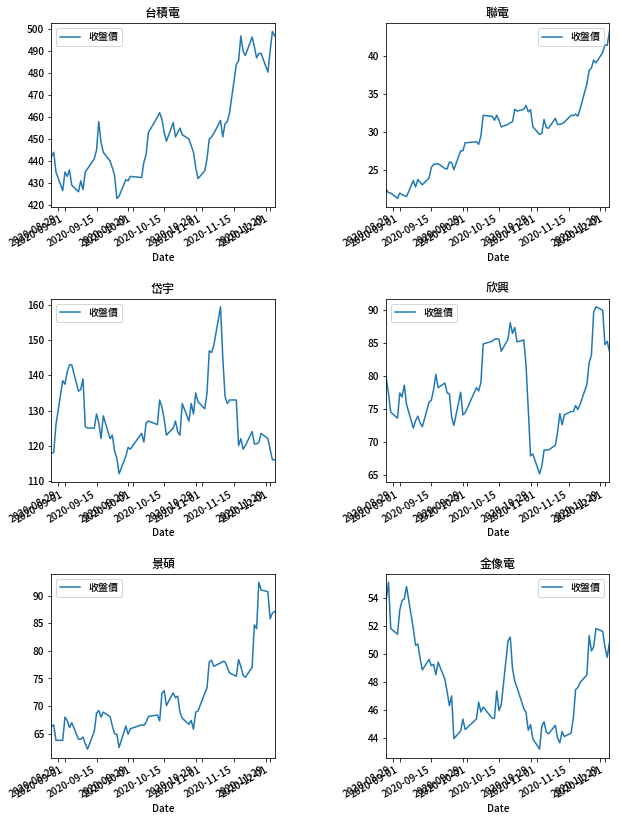

In [32]:
fig, ax = plt.subplots(3,2, figsize = (10, 15))
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
stock_dict['台積電']['2020-08-26':].plot(ax = ax[0,0])
ax[0,0].set_title('台積電')
stock_dict['聯電']['2020-08-26':].plot(ax = ax[0,1])
ax[0,1].set_title('聯電')
stock_dict['岱宇']['2020-08-26':].plot(ax = ax[1,0])
ax[1,0].set_title('岱宇')
stock_dict['欣興']['2020-08-26':].plot(ax = ax[1,1])
ax[1,1].set_title('欣興')
stock_dict['景碩']['2020-08-26':].plot(ax = ax[2,0])
ax[2,0].set_title('景碩')
stock_dict['金像電']['2020-08-26':].plot(ax = ax[2,1])
ax[2,1].set_title('金像電')

## 圖像判斷法
* 估計股票的波動程度來評估風險，可以用標準差來衡量波動程度
* 但是每天的股價統計性質可能會差大，用過去的股價估計出來的波動程度就無法有效衡量明天的波動程度
* 因此希望前後天的股價是獨立且有相似的分配，這邊用簡單的方式呈現股價前後天的關係

Text(0.5, 1.0, '前後兩天收盤價分布')

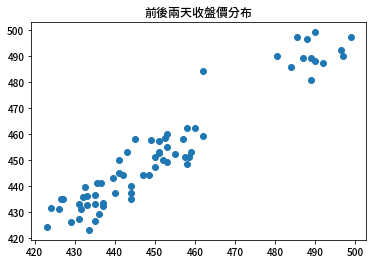

In [36]:
### 用TSMC當例子
df = stock_dict['台積電'].copy()
df_p = df['2020-08-26':].iloc[:-1,:]
df_a = df['2020-08-26':].iloc[1:,:]
plt.scatter(np.array(df_p['收盤價']), np.array(df_a['收盤價']))
plt.title('前後兩天收盤價分布')  ### 可以看出今天的收盤價跟明天的收盤價呈正相關

([array([ 6., 13.,  8.,  2.,  2.,  1.,  0.,  0.,  0.,  0.]),
  array([ 0.,  3.,  2., 11.,  6.,  2.,  0.,  1.,  8.,  5.])],
 array([423. , 430.6, 438.2, 445.8, 453.4, 461. , 468.6, 476.2, 483.8,
        491.4, 499. ]),
 <a list of 2 Lists of Patches objects>)

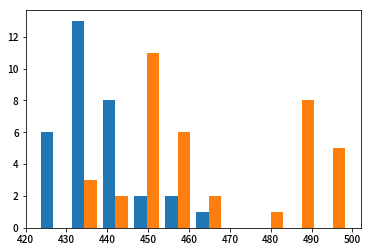

In [37]:
plt.hist([np.array(df['2020-08-26':'2020-10-13']['收盤價']), np.array(df['2020-10-13':]['收盤價'])])
### 發現兩個期間股價並非同個分配

## 計算股價百分比的變化

In [38]:
df['較前一天漲幅百分比'] = df['收盤價'].pct_change()

In [39]:
df.head()

,證券名稱,收盤價,較前一天漲幅百分比
Date,,,
2020-08-26,台積電,442.0,NaN
2020-08-27,台積電,444.0,0.004525
2020-08-28,台積電,435.0,-0.020270
2020-08-31,台積電,426.5,-0.019540
2020-09-01,台積電,435.0,0.019930


Text(0.5, 1.0, '前後兩天漲幅百分比分布')

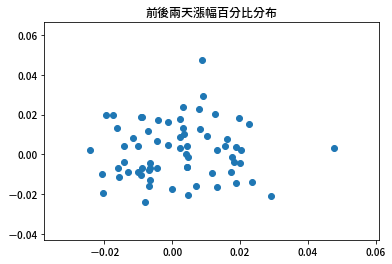

In [41]:
df_lrp = df['2020-08-26':].iloc[:-1,:]
df_lra = df['2020-08-26':].iloc[1:,:]
plt.scatter(np.array(df_lrp['較前一天漲幅百分比']), np.array(df_lra['較前一天漲幅百分比']))
plt.title('前後兩天漲幅百分比分布')

([array([4., 2., 6., 5., 6., 5., 2., 1., 0., 0.]),
  array([1., 7., 9., 9., 2., 5., 4., 0., 0., 1.])],
 array([-0.02422145, -0.0170374 , -0.00985335, -0.0026693 ,  0.00451475,
         0.0116988 ,  0.01888285,  0.0260669 ,  0.03325095,  0.040435  ,
         0.04761905]),
 <a list of 2 Lists of Patches objects>)

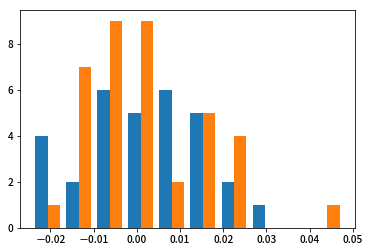

In [53]:
plt.hist([np.array(df['2020-08-26':'2020-10-13']['較前一天漲幅百分比']), np.array(df['2020-10-13':]['較前一天漲幅百分比'])])

### 發現轉換成報酬率後，前後兩天的關係進接近獨立，然後也可能...來自同的分配(假設滿足iid))
### 可以假設報酬率服從某種機率分配 就可以對報酬率進行風險評估了 (嘗試MLE)

In [44]:
## 假設服從常態分配 則MLE為: type(X) = list
def MLE_mu_normal(X):
    n = len(X)
    return sum(X)/n
def MLE_sigma_normal(X):
    n = len(X)
    mu_hat = MLE_mu_normal(X)
    s = sum([(x - mu_hat)**2 for x in X])
    return s/n     

In [45]:
print(MLE_mu_normal([1,2,3]))
print(MLE_sigma_normal([1,2,3]))

2.0
0.6666666666666666


In [46]:
df.head()

,證券名稱,收盤價,較前一天漲幅百分比
Date,,,
2020-08-26,台積電,442.0,NaN
2020-08-27,台積電,444.0,0.004525
2020-08-28,台積電,435.0,-0.020270
2020-08-31,台積電,426.5,-0.019540
2020-09-01,台積電,435.0,0.019930


In [47]:
import math

price_list = list(df['收盤價'])
ratio_list = [p_1/p_2 for p_1, p_2 in zip(price_list[1:], price_list[:-1])]
c_return_list = [math.log(x) for x in ratio_list]

In [48]:
mu = MLE_mu_normal(c_return_list)
sigma_2 = MLE_sigma_normal(c_return_list)
print(mu)
print(sigma_2)

0.0017247080002783912
0.00019107444849527042


## 看看用樣本畫出的圖 跟 MLE估計出的分配

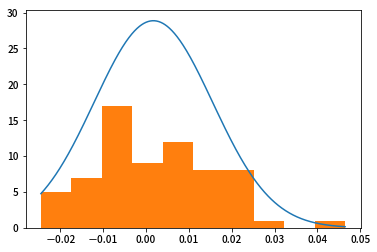

In [49]:
import scipy.stats as stats
import numpy as np

h = sorted(c_return_list)
x_axis = np.arange(h[0], h[-1], 0.0001)
plt.plot(x_axis, stats.norm.pdf(x_axis, mu, math.sqrt(sigma_2)))
plt.hist(h)
plt.show()

### 日報酬 < 0 的機率 ：

In [50]:
stats.norm(mu, math.sqrt(sigma_2)).cdf(0)

0.4503523533895454

### 日報酬 > 2% 的機率 :

In [52]:
1 - stats.norm(mu, math.sqrt(sigma_2)).cdf(0.02)

0.09306807955892038